# 1. Perkenalan
Nama : Ulul Azmi \
Batch : FTDS 015 \
Dataset : credit_card_default dari BigQuery, klik link [berikut](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table) \

## Problems : 
Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

## Conceptual Problems
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan
2. salah satu criterion yang kalian pahami!
3. Apakah fungsi dari pruning pada Tree model?
4. Bagaimana cara memilih K yang optimal pada KNN?
5. Jelaskan apa yang kalian ketahui tentang Cross Validation!
6. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

---

## Dataset Details

| Nama Kolom | Deskripsi |
| --- | --- |
| limit_balance | Jumlah kredit yang diberikan dalam dolar NT (termasuk kredit individu dan keluarga/tambahan) |
| sex | Jenis Kelamin (1=laki-laki, 2=perempuan) |
| education_level | (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) |
| marital_status | Status perkawinan (1=menikah, 2=lajang, 3=lain-lain) |
| age | Usia dalam tahun |
| pay_0 | Status pelunasan bulan September 2005 (-1=membayar sewajarnya,1=keterlambatan pembayaran selama satu bulan, 2=penundaan pembayaran selama dua bulan, ... 8=penundaan pembayaran selama delapan bulan, 9=penundaan pembayaran selama sembilan bulan ke atas) |
| pay_2 | Status pelunasan pada Agustus 2005 (skala sama dengan di atas) |
| pay_3 | Status pelunasan pada Juli 2005 (skala sama dengan di atas) |
| pay_4 | Status pelunasan pada Juni 2005 (skala sama dengan di atas) |
| pay_5 | Status pelunasan pada Mei 2005 (skala sama dengan di atas) |
| pay_6 | Status pelunasan pada April 2005 (skala sama dengan di atas) |
| bill_amt_1 | Jumlah tagihan tagihan pada bulan September 2005 (dolar NT) |
| bill_amt_2 | Jumlah tagihan tagihan pada bulan Agustus 2005 (dolar NT) |
| bill_amt_3 | Jumlah tagihan tagihan pada bulan Juli 2005 (dolar NT) |
| bill_amt_4 | Jumlah tagihan tagihan pada bulan Juni 2005 (dolar NT) |
| bill_amt_5 | Jumlah tagihan tagihan pada bulan Mei 2005 (dolar NT) |
| bill_amt_6 | Jumlah tagihan tagihan pada bulan April 2005 (dolar NT) |
| pay_amt_1 | Jumlah pembayaran sebelumnya pada bulan September 2005 (dolar NT) |
| pay_amt_2 | Jumlah pembayaran sebelumnya pada bulan Agustus 2005 (dolar NT) |
| pay_amt_3 | Jumlah pembayaran sebelumnya pada bulan Juli 2005 (dolar NT) |
| pay_amt_4 | Jumlah pembayaran sebelumnya pada bulan Juni 2005 (dolar NT) |
| pay_amt_5 | Jumlah pembayaran sebelumnya pada bulan Mei 2005 (dolar NT) |
| pay_amt_6 | Jumlah pembayaran sebelumnya pada bulan April 2005 (dolar NT) |
| default_payment_next_month | Pembayaran default (1=ya, 0=tidak) |

# 2. Import Pustaka

In [309]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [310]:
!pip install numpy 
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [311]:
!pip install feature-engine

from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [312]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [313]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [314]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

In [315]:
import warnings
warnings.simplefilter("ignore")

# 3. Data Loading

In [316]:
# Hubungkan colab dengan BigQuery
auth.authenticate_user()
print('Authenticated')

project_id = "first-campaign-358808"
client = bigquery.Client(project=project_id)

Authenticated


In [317]:
# Load Dataset dari Google BigQuery
data = client.query('''SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 29910;
''').to_dataframe()

In [318]:
# Tampilkan 5 data teratas
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [319]:
# Tampilkan 5 data terbawah
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [320]:
# Check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   object 
 2   education_level             2965 non-null   object 
 3   marital_status              2965 non-null   object 
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   object 
 10  pay_6                       2965 non-null   object 
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [321]:
# Change data type sex, education_level, marital_status,pay_5, pay_6, default_payment_next_month so i can see the correlation
data["sex"] = data["sex"].astype("int")
data["education_level"] = data["education_level"].astype("int")
data["marital_status"] = data["marital_status"].astype("int")
data["pay_5"] = data["pay_5"].astype("float")
data["pay_6"] = data["pay_6"].astype("float")
data["default_payment_next_month"] = data["default_payment_next_month"].astype("int")

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [323]:
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


# 4. Exploratory Data Analysis

In [324]:
# Check Missing Values
data.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

tidak terdapat missing values

In [325]:
# Check unique Values
print(np.sort(data['limit_balance'].unique()))
print('Total Unique Values :', data['limit_balance'].nunique())

[ 10000.  20000.  30000.  40000.  50000.  60000.  70000.  80000.  90000.
 100000. 110000. 120000. 130000. 140000. 150000. 160000. 170000. 180000.
 190000. 200000. 210000. 220000. 230000. 240000. 250000. 260000. 270000.
 280000. 290000. 300000. 310000. 320000. 330000. 340000. 350000. 360000.
 370000. 380000. 390000. 400000. 410000. 420000. 430000. 440000. 450000.
 460000. 470000. 480000. 490000. 500000. 510000. 530000. 560000. 620000.
 680000. 700000. 750000. 780000. 800000.]
Total Unique Values : 59


In [326]:
# Check unique Values
print(np.sort(data['sex'].unique()))
print('Total Unique Values :', data['sex'].nunique())

[1 2]
Total Unique Values : 2


In [327]:
# Check unique Values
print(np.sort(data['education_level'].unique()))
print('Total Unique Values :', data['education_level'].nunique())

[0 1 2 3 4 5 6]
Total Unique Values : 7


0,6 and 5 tidak di ketahui detailsnya maka saya akan merubahnya sebagai 4 yang merupakan others

In [328]:
# 0,6 and 5 are undocumented and unlabelled data so we are changing the values 0,6 and 5 to 4(others category)
credit_edu = ((data['education_level'] == 0) | (data['education_level'] == 6) | (data['education_level'] == 5))

data.loc[credit_edu, 'education_level'] = 4

print(np.sort(data['education_level'].unique()))
print('Total Unique Values :', data['education_level'].nunique())

[1 2 3 4]
Total Unique Values : 4


In [329]:
# Check unique Values
print(np.sort(data['marital_status'].unique()))
print('Total Unique Values :', data['marital_status'].nunique())

[0 1 2 3]
Total Unique Values : 4


0 tidak di ketahui detailsnya maka saya akan merubahnya sebagai 3 yg merupakan others

In [330]:
# 0 are undocumented and unlabelled data so we are changing the values 0 to 3(others category)
credit_marital_status = (data['marital_status'] == 0)

data.loc[credit_marital_status, 'marital_status'] = 3

print(np.sort(data['marital_status'].unique()))
print('Total Unique Values :', data['marital_status'].nunique())

[1 2 3]
Total Unique Values : 3


In [331]:
# Check unique Values
print(np.sort(data['age'].unique()))
print('Total Unique Values :', data['age'].nunique())

[21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38.
 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56.
 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
Total Unique Values : 49


In [332]:
# Check unique Values
print(np.sort(data['pay_0'].unique()))
print('Total Unique Values :', data['pay_0'].nunique())

[-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
Total Unique Values : 11


In [333]:
# Check unique Values
print(np.sort(data['pay_2'].unique()))
print('Total Unique Values :', data['pay_2'].nunique())

[-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]
Total Unique Values : 10


In [334]:
# Check unique Values
print(np.sort(data['pay_3'].unique()))
print('Total Unique Values :', data['pay_3'].nunique())

[-2. -1.  0.  2.  3.  4.  5.  6.  7.]
Total Unique Values : 9


In [335]:
# Check unique Values
print(np.sort(data['pay_4'].unique()))
print('Total Unique Values :', data['pay_4'].nunique())

[-2. -1.  0.  2.  3.  4.  5.  6.  7.  8.]
Total Unique Values : 10


In [336]:
# Check unique Values
print(np.sort(data['pay_5'].unique()))
print('Total Unique Values :', data['pay_5'].nunique())

[-2. -1.  0.  2.  3.  4.  5.  6.  7.]
Total Unique Values : 9


In [337]:
# Check unique Values
print(np.sort(data['pay_6'].unique()))
print('Total Unique Values :', data['pay_6'].nunique())

[-2. -1.  0.  2.  3.  4.  6.  7.]
Total Unique Values : 8


pada pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 nilai -2 tidak diketahui detailsnya, berdasarkan pengamatan saya pada unique valuesnya, nilai yang -2 dan 0 itu mungkin sama dengan -1 (membayar sewajarnya). untuk itu saya akan merubahnya menjadi -1

In [338]:
# replace -2 & 0 values in pay_0, pay_2, pay_3, pay_4, pay_5, and pay_6 to -1

credit_pay = ((data['pay_0'] == -2) | (data['pay_0'] == 0))
data.loc[credit_pay, 'pay_0'] = -1

credit_pay = ((data['pay_2'] == -2) | (data['pay_2'] == 0))
data.loc[credit_pay, 'pay_2'] = -1

credit_pay = ((data['pay_3'] == -2) | (data['pay_3'] == 0))
data.loc[credit_pay, 'pay_3'] = -1

credit_pay = ((data['pay_4'] == -2) | (data['pay_4'] == 0))
data.loc[credit_pay, 'pay_4'] = -1

credit_pay = ((data['pay_5'] == -2) | (data['pay_5'] == 0))
data.loc[credit_pay, 'pay_5'] = -1

credit_pay = ((data['pay_6'] == -2) | (data['pay_6'] == 0))
data.loc[credit_pay, 'pay_6'] = -1

In [339]:
# Check unique Values
print(np.sort(data['pay_6'].unique()))
print('Total Unique Values :', data['pay_6'].nunique())

[-1.  2.  3.  4.  6.  7.]
Total Unique Values : 6


In [340]:
# Check unique Values
print(np.sort(data['bill_amt_1'].unique()))
print('Total Unique Values :', data['bill_amt_1'].nunique())

[-11545.  -5684.  -3309. ... 504644. 533142. 613860.]
Total Unique Values : 2643


In [341]:
# Check unique Values
print(np.sort(data['bill_amt_2'].unique()))
print('Total Unique Values :', data['bill_amt_2'].nunique())

[-67526.  -9850.  -4925. ... 504834. 512526. 512650.]
Total Unique Values : 2592


In [342]:
# Check unique Values
print(np.sort(data['bill_amt_3'].unique()))
print('Total Unique Values :', data['bill_amt_3'].nunique())

[-25443.  -9850.  -6674. ... 488166. 559712. 578971.]
Total Unique Values : 2549


In [343]:
# Check unique Values
print(np.sort(data['bill_amt_4'].unique()))
print('Total Unique Values :', data['bill_amt_4'].nunique())

[-46627. -27490.  -2830. ... 419454. 485249. 488808.]
Total Unique Values : 2504


In [344]:
# Check unique Values
print(np.sort(data['bill_amt_5'].unique()))
print('Total Unique Values :', data['bill_amt_5'].nunique())

[-46627.  -7941.  -7220. ... 395430. 427064. 441981.]
Total Unique Values : 2482


In [345]:
# Check unique Values
print(np.sort(data['bill_amt_6'].unique()))
print('Total Unique Values :', data['bill_amt_6'].nunique())

[-73895. -51183. -46627. ... 410127. 424592. 436172.]
Total Unique Values : 2461


In [346]:
# Check unique Values
print(np.sort(data['pay_amt_1'].unique()))
print('Total Unique Values :', data['pay_amt_1'].nunique())

[0.00000e+00 1.00000e+00 2.00000e+00 ... 2.72817e+05 4.05016e+05
 4.93358e+05]
Total Unique Values : 1415


In [347]:
# Check unique Values
print(np.sort(data['pay_amt_2'].unique()))
print('Total Unique Values :', data['pay_amt_2'].nunique())

[0.000000e+00 1.000000e+00 2.000000e+00 ... 3.029610e+05 5.804640e+05
 1.227082e+06]
Total Unique Values : 1372


In [348]:
# Check unique Values
print(np.sort(data['pay_amt_3'].unique()))
print('Total Unique Values :', data['pay_amt_3'].nunique())

[0.00000e+00 2.00000e+00 3.00000e+00 ... 1.88841e+05 1.98748e+05
 1.99209e+05]
Total Unique Values : 1302


In [349]:
# Check unique Values
print(np.sort(data['pay_amt_4'].unique()))
print('Total Unique Values :', data['pay_amt_4'].nunique())

[0.00000e+00 2.00000e+00 3.00000e+00 ... 1.84483e+05 1.84637e+05
 2.02076e+05]
Total Unique Values : 1214


In [350]:
# Check unique Values
print(np.sort(data['pay_amt_5'].unique()))
print('Total Unique Values :', data['pay_amt_5'].nunique())

[0.00000e+00 1.00000e+00 2.00000e+00 ... 2.31133e+05 3.00000e+05
 3.88071e+05]
Total Unique Values : 1194


In [351]:
# Check unique Values
print(np.sort(data['pay_amt_6'].unique()))
print('Total Unique Values :', data['pay_amt_6'].nunique())

[0.00000e+00 1.00000e+00 3.00000e+00 ... 2.19844e+05 2.28300e+05
 4.03500e+05]
Total Unique Values : 1189


In [352]:
# Check unique Values
print(np.sort(data['default_payment_next_month'].unique()))
print('Total Unique Values :', data['default_payment_next_month'].nunique())

[0 1]
Total Unique Values : 2


In [353]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (data) and the variable of interest as arguments.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

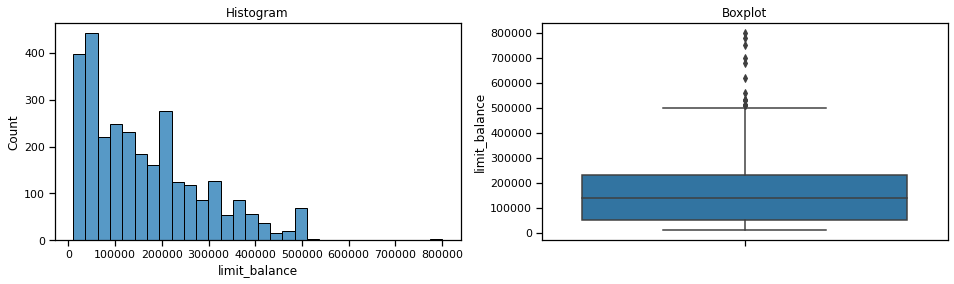


Skewness Value :  1.0004416437793329


In [354]:
# Create Histogram & boxplot limit_balance distribution

diagnostic_plots(data, 'limit_balance')
print('\nSkewness Value : ', data['limit_balance'].skew())

pengguna kartu kredit paling banyak memilki limit $ 140.000

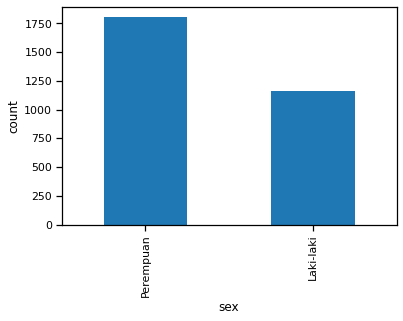

In [355]:
# Check distribution data sex
data['sex'].replace({1:'Laki-laki', 2:'Perempuan'}).value_counts().plot(kind='bar')
plt.xlabel("sex")
plt.ylabel("count")
plt.show()

pengguna perempuan lebih banyak dibanding laki-laki

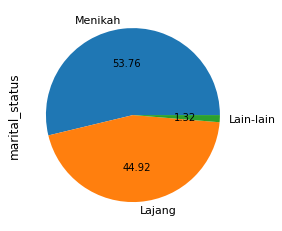

In [356]:
# Check Distribution data marital_status
data['marital_status'].replace({1:'Lajang', 2:'Menikah', 3:'Lain-lain'}).value_counts().plot(kind='pie',autopct='%.2f') #replaced '1':single, '2':'married, '3':Others

53.76 % pengguna sudah menikah, 44.92% single dan 1.32% lain-lain

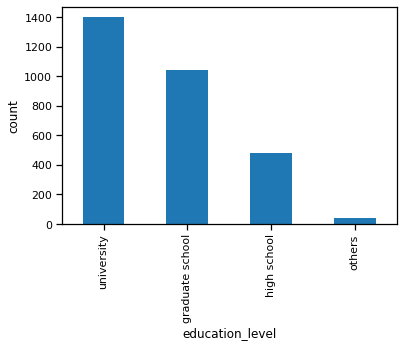

In [357]:
# Check Distribution data education_level
data['education_level'].replace({1:'graduate school', 2:'university', 3:'high school', 4:'others'}).value_counts().plot(kind='bar')
plt.xlabel("education_level")
plt.ylabel("count")
plt.show()

pengguna kartu kredit pada umumnya memiliki tingkat pendidikan university

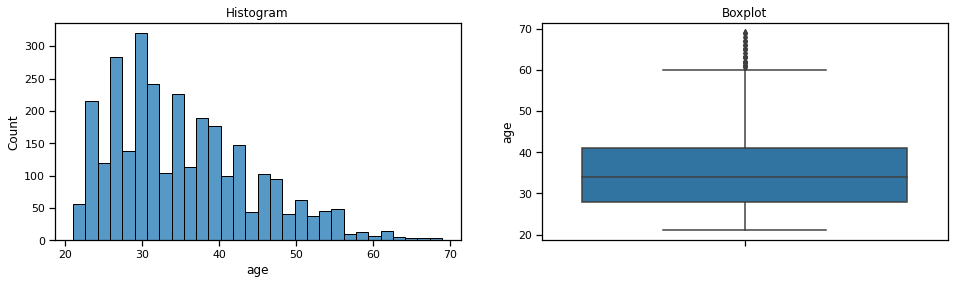


Skewness Value :  0.7728871800647299


In [358]:
# Check Distribution data age
diagnostic_plots(data, 'age')
print('\nSkewness Value : ', data['age'].skew())

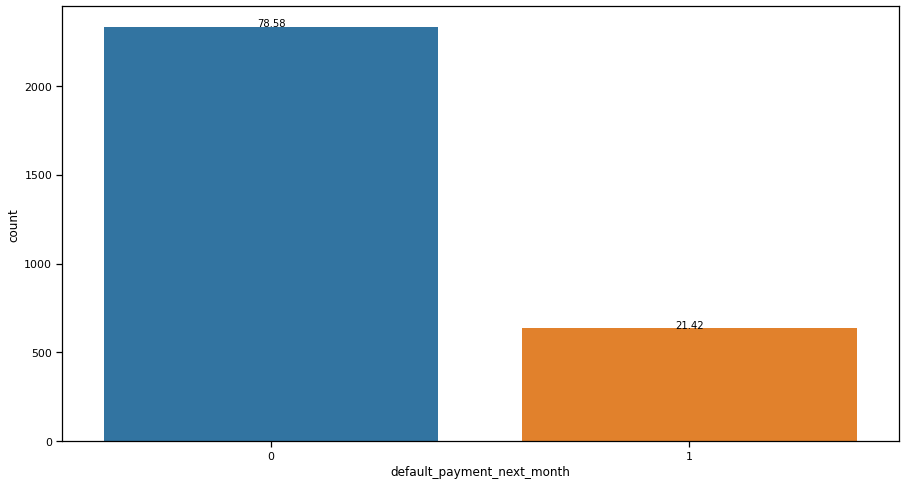

In [359]:
# Create Histogram default_payment_next_month distribution

plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="default_payment_next_month", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

status pembayaran default pada bulan depan paling banyak no

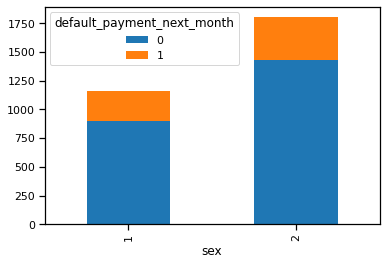

In [360]:
# relationship between Sex column and default_payment_next_month column

sex_pay = data.groupby(['sex', 'default_payment_next_month']).size().unstack(1)
sex_pay.plot(kind='bar', stacked = True)

status pembayaran default pada bulan depan lebih banyak pada perempuan dibanding laki laki

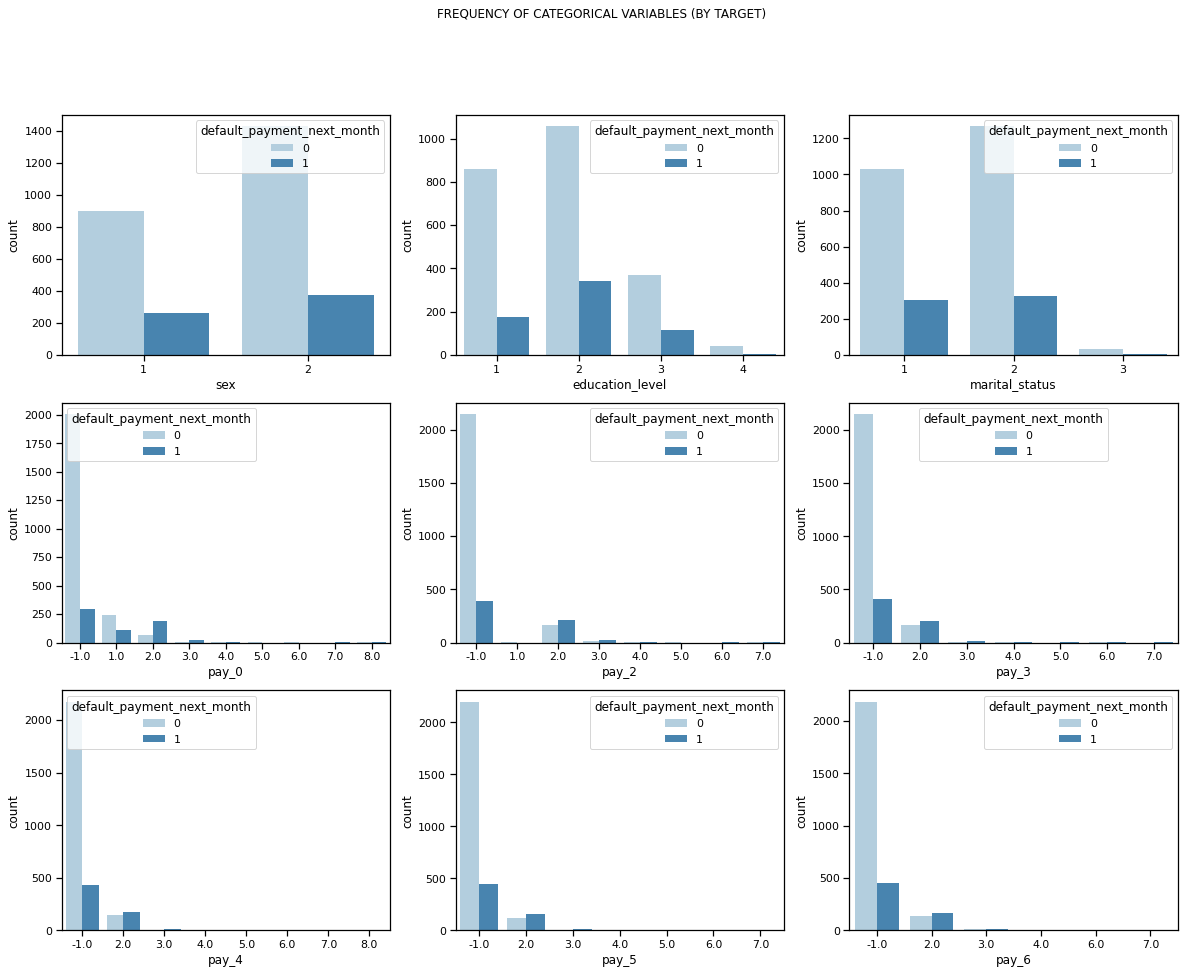

In [361]:
# Creating a new dataframe with categorical variables
subset = data[['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 
               'pay_5', 'pay_6', 'default_payment_next_month']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="sex", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="education_level", hue="default_payment_next_month", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="marital_status", hue="default_payment_next_month", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="pay_0", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="pay_2", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="pay_3", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="pay_4", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="pay_5", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="pay_6", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[2,2]);

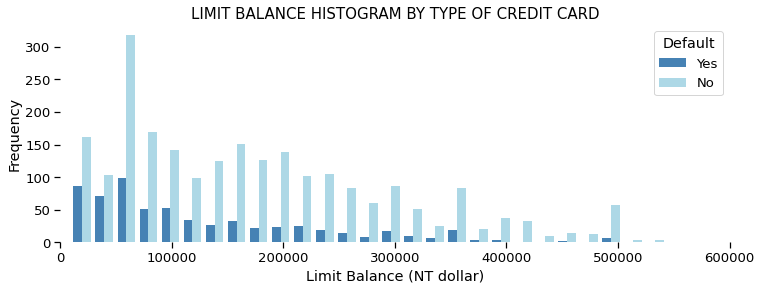

In [362]:
x1 = list(data[data['default_payment_next_month'] == 1]['limit_balance'])
x2 = list(data[data['default_payment_next_month'] == 0]['limit_balance'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

Ada 2965 klien kartu kredit.

Nilai rata-rata untuk jumlah batas kartu kredit adalah 163.369 dolar. Standar deviasinya adalah 125030 dolar, mulai dari 10.000 hingga 800.000 dolar.

Tingkat pendidikan sebagian besar adalah lulusan sekolah dan universitas.

Sebagian besar klien sudah menikah atau lajang (lebih jarang status lainnya).

Usia rata-rata adalah 35,19 tahun, dengan standar deviasi 9,1.

Karena nilai 0 untuk pembayaran default berarti 'tidak default' dan nilai 1 berarti 'default', mean 0,214 berarti ada 21,42% kontrak kartu kredit yang akan default bulan depan (akan memverifikasi ini di bagian selanjutnya dari analisis ini ).

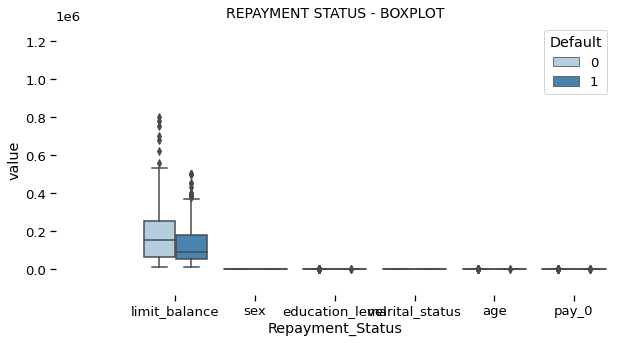

In [363]:
# Boxplot distribution default_payment_next_month with pay_0 - 6
Repayment = data[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]

Repayment = pd.concat([data,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="default_payment_next_month",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="default_payment_next_month", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

**Standardizing and plotting the data**

In [364]:
# Separating features and target
y = data.default_payment_next_month     # target default_payment_next_month=1 or non-default_payment_next_month=0
features = data.drop('default_payment_next_month', axis = 1, inplace = False)

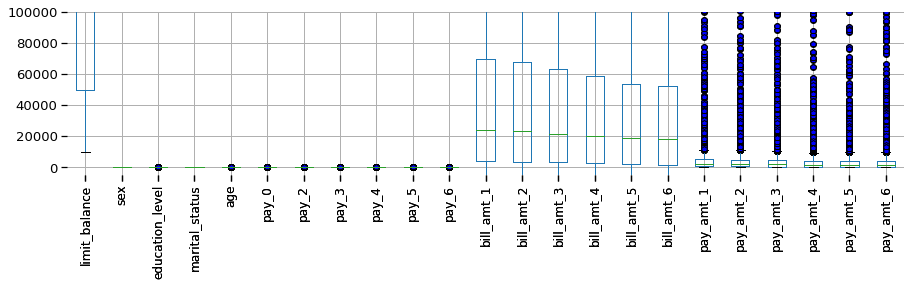

In [365]:
## data are distributed in a wide range (below), need to be normalizded.
plt.figure(figsize=(15,3))
ax= data.drop('default_payment_next_month', axis=1).boxplot(data.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.box(False);


Boxplot ini mengungkapkan bahwa fitur berada dalam skala dan unit yang berbeda. Banyak model menggunakan beberapa bentuk jarak saat membuat prediksi, dan oleh karena itu, direkomendasikan untuk menormalkan data.

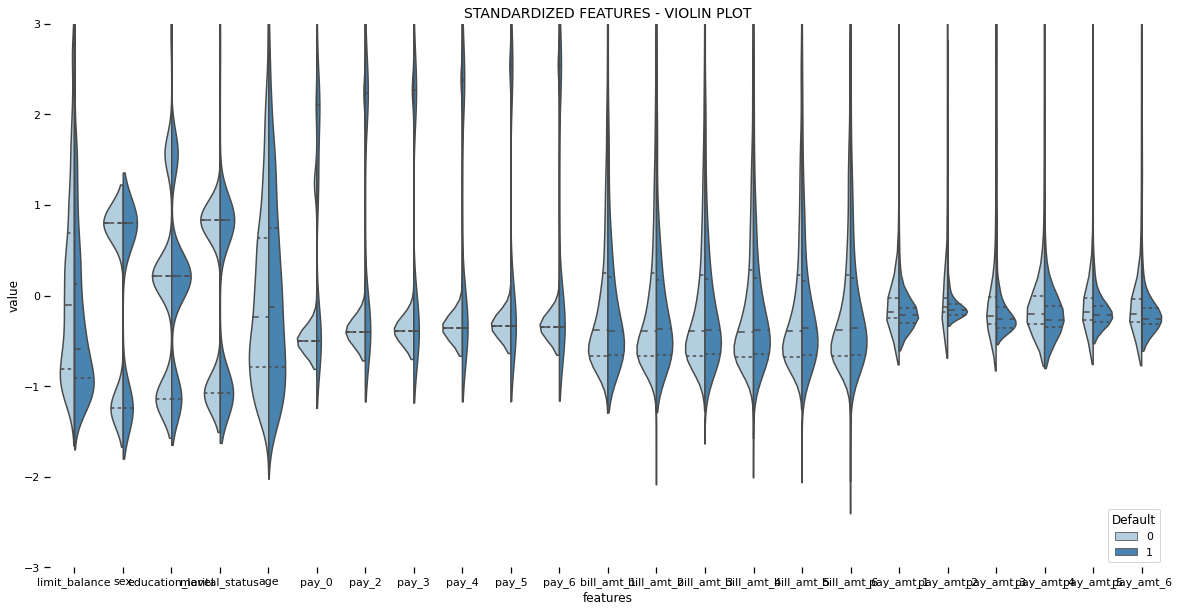

In [366]:
# Standarisasi data dilakukan; yaitu, semua fitur dipusatkan di sekitar nol dan memiliki varian satu. Fitur diplot lagi, menggunakan plot biola.
stdX = (features - features.mean()) / (features.std())              # standardization
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="default_payment_next_month",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.set_context('notebook', font_scale=1)
sns.violinplot(y="value", x="features", hue="default_payment_next_month", data=data_st,split=True, 
               inner="quart", palette='Blues')
plt.legend(loc=4, title= 'Default', facecolor='white')
plt.ylim([-3,3])
plt.title('STANDARDIZED FEATURES - VIOLIN PLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False);

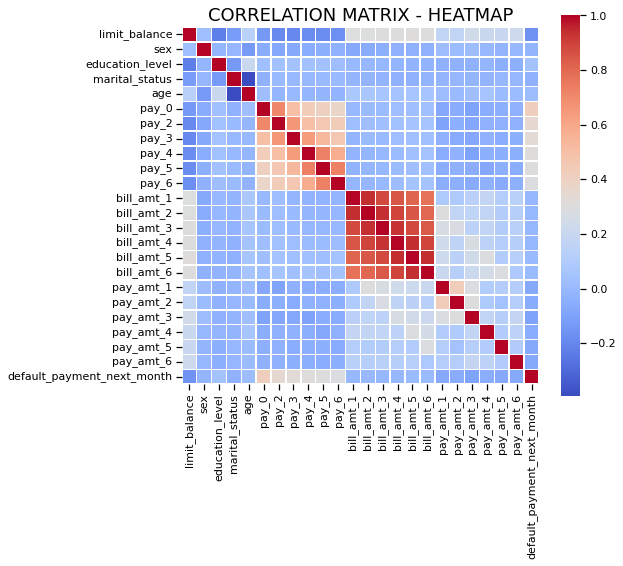

In [367]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

Heatmap menunjukkan bahwa fitur-fitur tersebut saling berkorelasi, seperti PAY_0,2,3,4,5,6 dan BILL_AMT1,2,3,4,5,6. Dalam kasus tersebut, korelasinya positif.

# 5. Data Preprocessing

## Get Data for Model Inference

In [368]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=17)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
91,420000.0,2,2,2,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
325,30000.0,2,2,2,25.0,2.0,-1.0,-1.0,-1.0,-1.0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
47,40000.0,2,3,1,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
1488,70000.0,2,3,3,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
446,60000.0,2,2,2,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
567,300000.0,2,1,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
1473,500000.0,1,1,2,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
548,490000.0,2,2,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
1768,80000.0,1,1,2,26.0,1.0,2.0,2.0,-1.0,-1.0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
1781,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2.0,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


In [369]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,-1.0,-1.0,-1.0,2.0,-1.0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [370]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000.0,2,2,2,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,-1.0,-1.0,-1.0,-1.0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,-1.0,-1.0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2.0,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


## Splitting between `X` (Features) and `y` (Target)

In [371]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,1,2,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0
1,110000.0,2,1,2,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0
2,270000.0,1,1,2,36.0,-1.0,-1.0,-1.0,2.0,-1.0,...,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0
3,130000.0,1,1,1,45.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0
4,50000.0,1,1,2,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0
2951,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-1.0,...,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0
2952,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-1.0,...,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0
2953,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0


In [372]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2364, 23)
Test Size  :  (591, 23)


## Handling Outliers

### Identifikasi Outliers

In [373]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (data) and the variable of interest as arguments.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

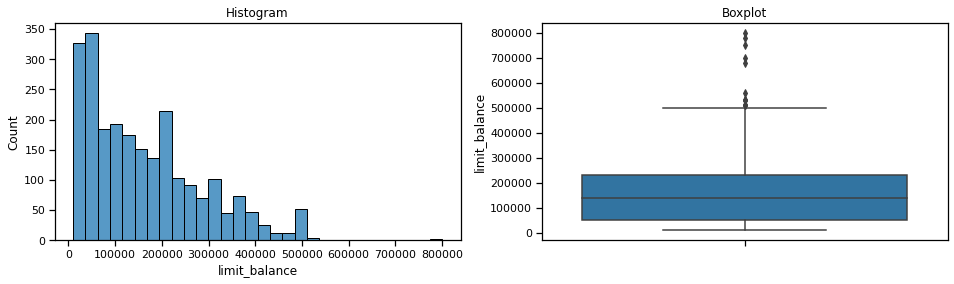


Skewness Value :  1.0079063479575001


In [374]:
# let's inspect now the variable limit_balance from the X_train

diagnostic_plots(X_train, 'limit_balance')
print('\nSkewness Value : ', X_train['limit_balance'].skew())

In [375]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(data, variable, distance):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [376]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `limit_balance` in X_train

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'limit_balance', 1.5)
upper_boundary, lower_boundary

(500000.0, -220000.0)

In [377]:
# Lets look at the number and percentage of outliers for `limit_balance`

print('Total data : {}'.format(len(X_train)))
print('People with limit_balance bigger than 500000   : {}'.format(len(X_train[X_train['limit_balance'] > upper_boundary])))
print('')
print('% People with limit_balance bigger than 500000 : {}'.format(len(X_train[X_train['limit_balance'] > upper_boundary])/len(X_train) * 100))

Total data : 2364
People with limit_balance bigger than 500000   : 12

% People with limit_balance bigger than 500000 : 0.5076142131979695


limit_balance sangat skew, dengan upper boundary 500000, dan lower boundary negatif. maka nilai diatas 500000 dianggap outliers. terdapat 12 data atau sekitar 0.50% dari total data yang dianggap outliers.

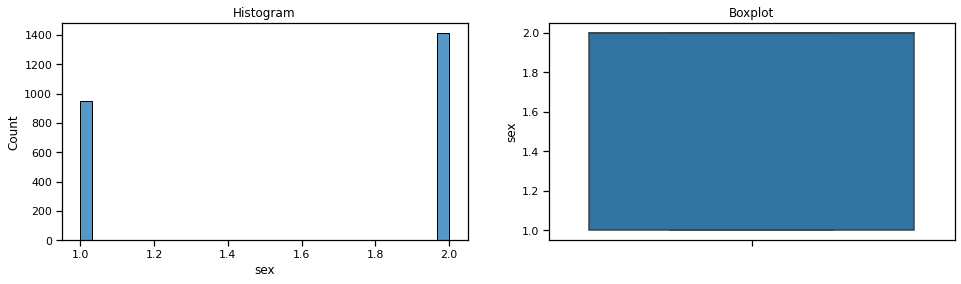


Skewness Value :  -0.39700658725926535


In [378]:
# let's inspect now the variable sex from the X_train

diagnostic_plots(X_train, 'sex')
print('\nSkewness Value : ', X_train['sex'].skew())

dari histogram dan boxplot tidak terlihat ada outliers

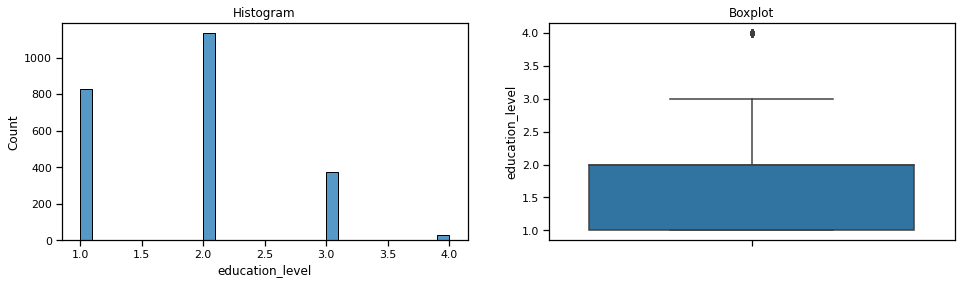


Skewness Value :  0.46372164273210714


In [379]:
# let's inspect now the variable education_level from the X_train

diagnostic_plots(X_train, 'education_level')
print('\nSkewness Value : ', X_train['education_level'].skew())

Dari histogram, kita melihat bahwa variabel rm mendekati distribusi Gaussian dengan cukup baik. Dalam boxplot, kita melihat bahwa variabel dapat memiliki outlier

In [380]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(data, variable):
    n_upper_boundary = data[variable].mean() + 3 * data[variable].std()
    n_lower_boundary = data[variable].mean() - 3 * data[variable].std()

    return n_upper_boundary, n_lower_boundary

In [381]:
# calculate boundaries for RM
n_upper_boundary, n_lower_boundary = find_normal_boundaries(data, 'education_level')
n_upper_boundary, n_lower_boundary

(4.059028216246285, -0.3760602567184608)

upper boundary education_level adalah 4.05 sedangkan lower boundary negatif. jadi saya hanya akan menggunakan upper boundaries untuk mendeteksi outliers

In [382]:
# Lets look at the number and percentage of outliers for `education_level`

print('Total data : {}'.format(len(X_train)))
print('People with education_level bigger than 4.05   : {}'.format(len(X_train[X_train['education_level'] > n_upper_boundary])))
print('')
print('% People with education_level bigger than 4.05 : {}'.format(len(X_train[X_train['education_level'] > n_upper_boundary])/len(X_train) * 100))

Total data : 2364
People with education_level bigger than 4.05   : 0

% People with education_level bigger than 4.05 : 0.0


tidak ada outliers

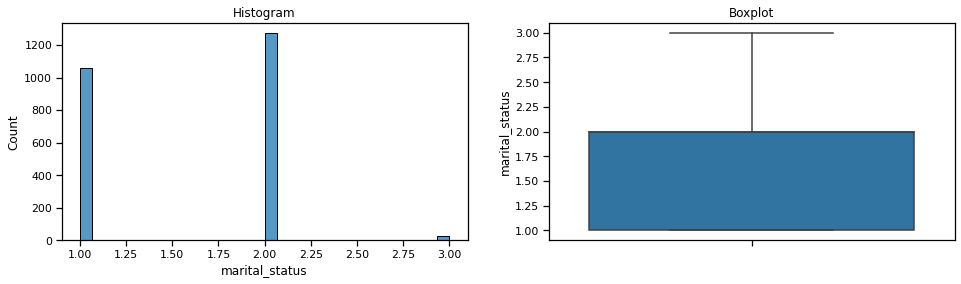


Skewness Value :  0.008171306520258543


In [383]:
# let's inspect now the variable marital_status from the X_train

diagnostic_plots(X_train, 'marital_status')
print('\nSkewness Value : ', X_train['marital_status'].skew())

tidak ada outliers

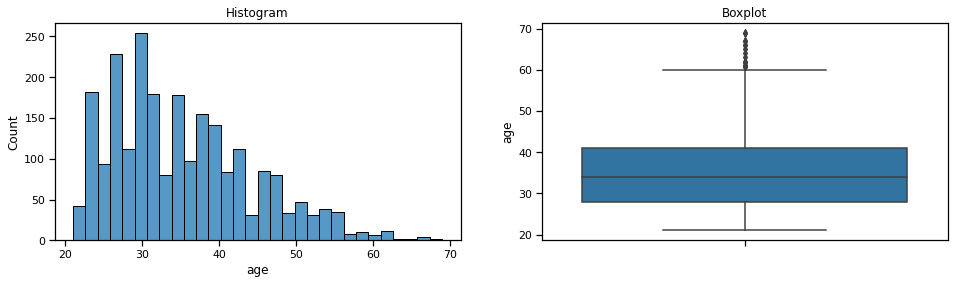


Skewness Value :  0.752240569900306


In [384]:
# let's inspect now the variable age from the X_train

diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

kolom age skew, dapat terlihat di boxplot terdapat outliers

In [385]:
# Looking for outliers, using the interquantile proximity rule IQR * 1.5, for `age` in X_train

upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'age', 1.5)
upper_boundary, lower_boundary

(60.5, 8.5)

upper boundary kolom age adalah 60.5 sedangkan lower boundarynya 8.5.

In [386]:
# Inspect the number and percentage of outliers for `age`

print('Total data: {}'.format(len(data)))
print('People with  age more than 60.5 (right end outliers) : {}'.format(len(data[data['age'] > upper_boundary])))
print('Houses with age less than 8.5 (left end outliers.  : {}'.format(len(data[data['age'] < lower_boundary])))
print('')
print('% right end outliers : {}'.format(len(data[data['age'] > upper_boundary]) / len(data) * 100))
print('% left end outliers  : {}'.format(len(data[data['age'] < lower_boundary]) / len(data) * 100))

Total data: 2965
People with  age more than 60.5 (right end outliers) : 29
Houses with age less than 8.5 (left end outliers.  : 0

% right end outliers : 0.9780775716694773
% left end outliers  : 0.0


sesuai bloxplot terdapat 29 outliers pada ujung kanan

### Capping

In [387]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['limit_balance', 'education_level', 'marital_status', 'age'])

windsoriser.fit(X_train)

X_train_t = windsoriser.transform(X_train)

In [388]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -220000.0, 'education_level': -0.5, 'marital_status': -0.5, 'age': 8.5}
Right Tail Caps :  {'limit_balance': 500000.0, 'education_level': 3.5, 'marital_status': 3.5, 'age': 60.5}


limit_balance - Before Capping


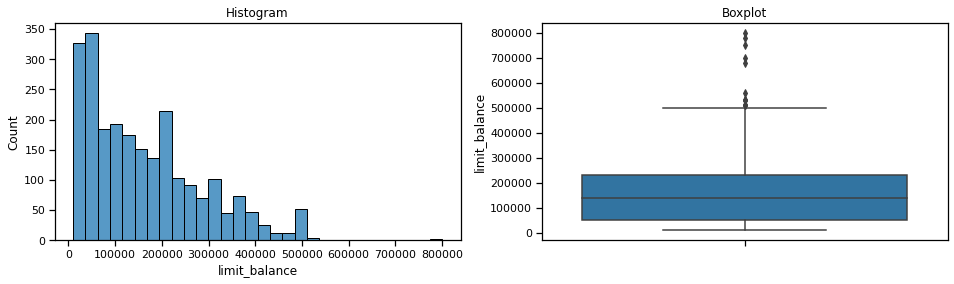


limit_balance - After Capping


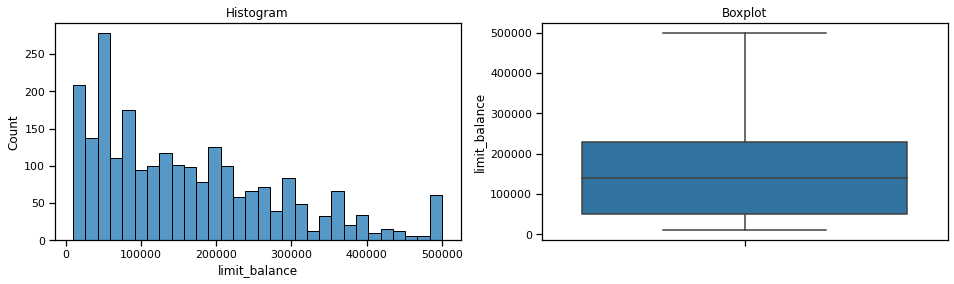

education_level - Before Capping


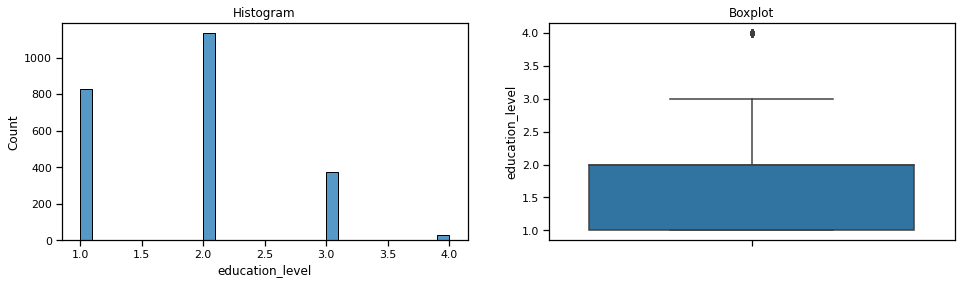


education_level - After Capping


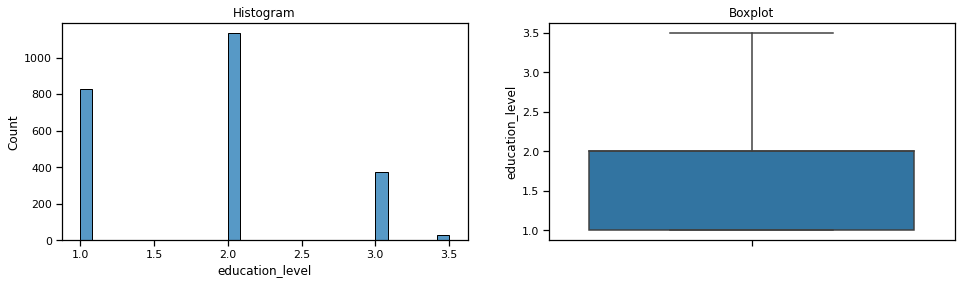

marital_status - Before Capping


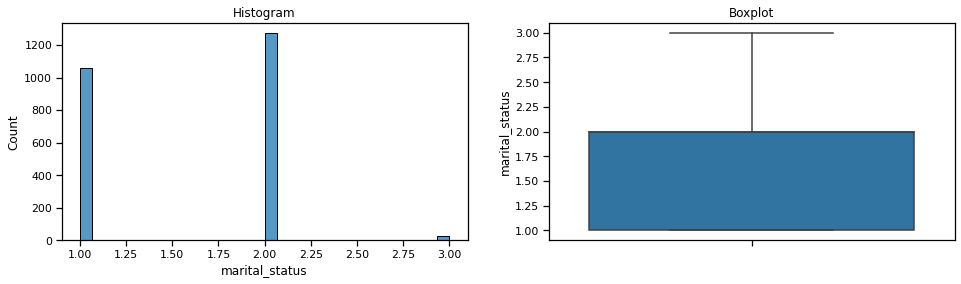


marital_status - After Capping


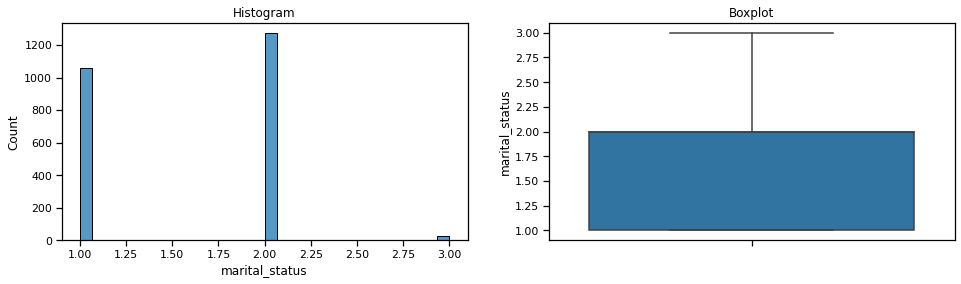

age - Before Capping


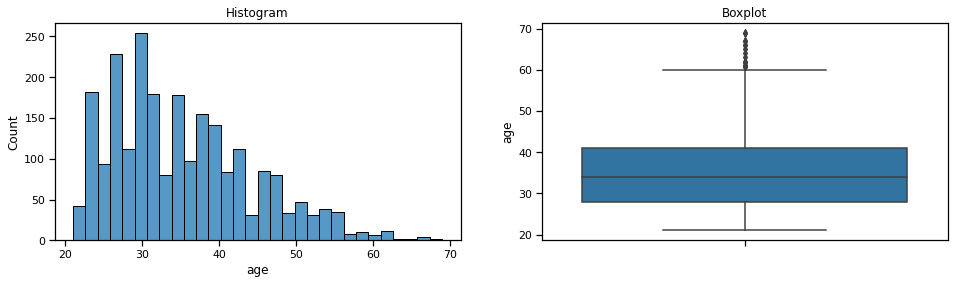


age - After Capping


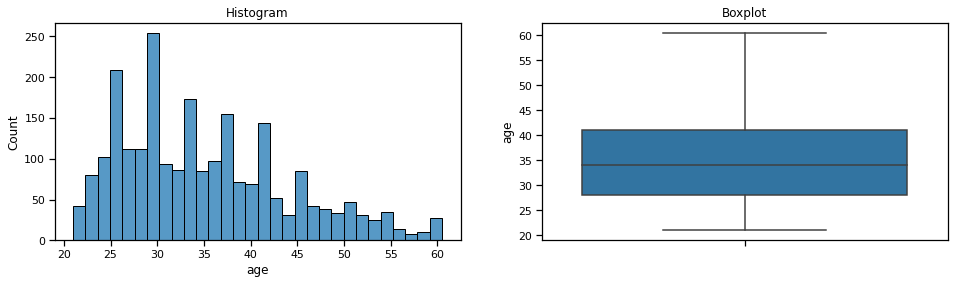

In [389]:
# Let's find outliers in 'limit_balance', 'education_level', 'marital_status', 'age'

print('limit_balance - Before Capping')
diagnostic_plots(X_train, 'limit_balance')
print('\nlimit_balance - After Capping')
diagnostic_plots(X_train_t, 'limit_balance')

print('education_level - Before Capping')
diagnostic_plots(X_train, 'education_level')
print('\neducation_level - After Capping')
diagnostic_plots(X_train_t, 'education_level')

print('marital_status - Before Capping')
diagnostic_plots(X_train, 'marital_status')
print('\nmarital_status - After Capping')
diagnostic_plots(X_train_t, 'marital_status')

print('age - Before Capping')
diagnostic_plots(X_train, 'age')
print('\nage - After Capping')
diagnostic_plots(X_train_t, 'age')

## Handling Missing Values

In [390]:
# Check Missing Values X_train
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [391]:
# Check Missing Values X_test
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Tidak ada Missing Values

## Feature Selection

pada tahap ini saya akan menggunakan semua fitur karena berdasarkan EDA saya melihat semua feature memiliki korelasi yang cukup tinggi terhadap default_payment_next_month

In [392]:
# Display X_train
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1364,50000.0,2,2,2,23.0,-1.0,-1.0,-1.0,-1.0,2.0,...,16922.0,19319.0,17644.0,18209.0,1605.0,1603.0,3000.0,0.0,1000.0,1000.0
1735,30000.0,2,1,2,36.0,1.0,2.0,-1.0,-1.0,-1.0,...,26060.0,26578.0,27133.0,27783.0,0.0,1433.0,951.0,983.0,1099.0,750.0
879,200000.0,2,2,1,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,150977.0,140358.0,130373.0,131885.0,6026.0,6007.0,5000.0,5000.0,5000.0,6000.0
2325,20000.0,2,2,1,42.0,1.0,3.0,2.0,-1.0,-1.0,...,19376.0,20295.0,19505.0,19964.0,0.0,0.0,1400.0,390.0,459.0,241.0
2863,140000.0,1,1,2,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1514.0,2573.0,495.0,1744.0,2024.0,1522.0,2580.0,496.0,1749.0,2265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,80000.0,1,3,1,31.0,1.0,2.0,-1.0,-1.0,-1.0,...,26856.0,27844.0,27480.0,28061.0,0.0,1459.0,1447.0,983.0,1023.0,1042.0
1095,230000.0,2,1,2,27.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,54176.0,42944.0,40391.0,35820.0,2963.0,1941.0,1534.0,1532.0,1565.0,1330.0
1130,210000.0,1,2,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,34174.0,34141.0,34456.0,34737.0,1600.0,1846.0,1209.0,1248.0,1247.0,1212.0
1294,60000.0,2,2,2,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,56616.0,56749.0,57504.0,58296.0,2030.0,2083.0,1983.0,2200.0,2500.0,2200.0


## Split between Numerical Columns and Categorical Columns

In [393]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


## Feature Scaling

In [394]:
# Feature Scaling using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_final = scaler.transform(X_train)
X_test_final = scaler.transform(X_test)

dikarenakan semua numeric maka saya akan melewatkan Feature encoding

In [395]:
# Create DataFrame of `X_train`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns])
X_train_final_df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.050633,1.0,0.333333,0.5,0.041667,0.000000,0.000,0.000,0.0,0.375,...,0.070093,0.123163,0.131539,0.180572,0.003253,0.001306,0.015060,0.000000,0.002577,0.004380
1,0.025316,1.0,0.000000,0.5,0.312500,0.222222,0.375,0.000,0.0,0.000,...,0.085211,0.136721,0.150959,0.199342,0.000000,0.001168,0.004774,0.005324,0.002832,0.003285
2,0.240506,1.0,0.333333,0.0,0.229167,0.000000,0.000,0.000,0.0,0.000,...,0.291886,0.349221,0.362254,0.403437,0.012214,0.004895,0.025099,0.027080,0.012884,0.026281
3,0.012658,1.0,0.333333,0.0,0.437500,0.222222,0.500,0.375,0.0,0.000,...,0.074153,0.124986,0.135348,0.184013,0.000000,0.000000,0.007028,0.002112,0.001183,0.001056
4,0.164557,0.0,0.000000,0.5,0.166667,0.000000,0.000,0.000,0.0,0.000,...,0.044600,0.091888,0.096441,0.148292,0.004102,0.001240,0.012951,0.002686,0.004507,0.009921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,0.088608,0.0,0.666667,0.0,0.208333,0.222222,0.375,0.000,0.0,0.000,...,0.086528,0.139085,0.151670,0.199887,0.000000,0.001189,0.007264,0.005324,0.002636,0.004564
2360,0.278481,1.0,0.000000,0.5,0.125000,0.000000,0.000,0.000,0.0,0.000,...,0.131729,0.167286,0.178094,0.215099,0.006006,0.001582,0.007700,0.008297,0.004033,0.005826
2361,0.253165,0.0,0.333333,0.0,0.187500,0.000000,0.000,0.000,0.0,0.000,...,0.098636,0.150846,0.165947,0.212976,0.003243,0.001504,0.006069,0.006759,0.003213,0.005309
2362,0.063291,1.0,0.333333,0.5,0.145833,0.000000,0.000,0.000,0.0,0.000,...,0.135766,0.193069,0.213118,0.259164,0.004115,0.001698,0.009954,0.011915,0.006442,0.009636


# 6. Model Definition

In [396]:
# membuat mod_SVM

mod_SVM = SVC(kernel='rbf', C = 1)

In [397]:
# membuat mod_LR

mod_LR = LogisticRegression(C =1, dual=False)

In [398]:
# membuat mod_DT

mod_DT = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 100)

In [399]:
# membuat mod_RF

mod_RF = RandomForestClassifier(n_estimators=20, oob_score=True)

In [400]:
# membuat mod_KNN

mod_KNN = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')

In [401]:
# membuat mod_NB

mod_NB1 = GaussianNB()

In [402]:
# membuat mod_NB

mod_NB2 = GaussianNB(var_smoothing = [1e5])

In [403]:
# membuat mod_GBC

mod_GBC = GradientBoostingClassifier(n_estimators=20)

# 7. Model training

In [404]:
# menghitung score mod_SVM
scores_SVM = cross_val_score(mod_SVM, X_train_final, y_train, cv=5)

# menghitung score mod_LR
scores_LR = cross_val_score(mod_LR, X_train_final, y_train, cv=5)

# menghitung score mod_DT
scores_DT = cross_val_score(mod_DT, X_train_final, y_train, cv=5)

# menghitung score mod_RF
scores_RF = cross_val_score(mod_RF, X_train_final, y_train, cv=5)

# menghitung score mod_KNN
scores_KNN = cross_val_score(mod_KNN, X_train_final, y_train, cv=5)

# menghitung score mod_NB
scores_NB = cross_val_score(mod_NB1, X_train_final, y_train, cv=5)

# menghitung score mod_GBC
scores_GBC = cross_val_score(mod_GBC, X_train_final, y_train, cv=5)

In [405]:
print(f'SVM Mean:{scores_SVM.mean()}')
print(f'SVM STD:{scores_SVM.std()}')

print(f'Logistic Regression Mean:{scores_LR.mean()}')
print(f'Logistic Regression STD:{scores_LR.std()}')

print(f'Decision Tree Mean:{scores_DT.mean()}')
print(f'Decision Tree STD:{scores_DT.std()}')

print(f'Random Forest Mean:{scores_RF.mean()}')
print(f'Random Forest STD:{scores_RF.std()}')

print(f'KNN Mean:{scores_KNN.mean()}')
print(f'KNN STD:{scores_KNN.std()}')

print(f'Naive Byas Mean:{scores_NB.mean()}')
print(f'Naive Byas STD:{scores_NB.std()}')

print(f'Gradien Boosting Mean:{scores_GBC.mean()}')
print(f'Gradien Boosting STD:{scores_GBC.std()}')

SVM Mean:0.820646253628122
SVM STD:0.009432081897940042
Logistic Regression Mean:0.8219210233991472
Logistic Regression STD:0.013754145251073468
Decision Tree Mean:0.7876482602931165
Decision Tree STD:0.000976376973550361
Random Forest Mean:0.8219183359013869
Random Forest STD:0.00889318073291852
KNN Mean:0.7872281148099043
KNN STD:0.015120466191323931
Naive Byas Mean:0.7423800480166267
Naive Byas STD:0.029022202801707444
Gradien Boosting Mean:0.8367246568961193
Gradien Boosting STD:0.015199055981858925


Berdasarkan Score tertinggi saya memilih Gradien Boosting Clasifier

In [406]:
# melakukan fit dan predict dengan mod_GBC

mod_GBC.fit(X_train_final,y_train)
y_pred_GBC_ran_test = mod_GBC.predict(X_test_final)
y_pred_GBC_ran_train = mod_GBC.predict(X_train_final)

In [407]:
# randomsearch untuk mod_GBC

%%time

random_grid = {'n_estimators': [10, 50, 150],
            'loss': ['log_loss', 'deviance', 'exponential'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [50, 100, 150],
            'min_samples_split': [50, 100, 150],
            'min_samples_leaf': [50, 100, 150],
            'criterion': ['friedman_mse', 'squared_error', 'mse']
            }

GBC_randomcv= RandomizedSearchCV(estimator=mod_GBC, param_distributions=random_grid, n_iter=40, cv=5, random_state=46)

GBC_randomcv.fit(X_train_final, y_train)

CPU times: user 49 s, sys: 105 ms, total: 49.1 s
Wall time: 51 s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=20),
                   n_iter=40,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [50, 100, 150],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [50, 100, 150],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [10, 50, 150]},
                   random_state=46)

In [408]:
# melihat best_param

GBC_randomcv.best_params_

{'n_estimators': 50,
 'min_samples_split': 100,
 'min_samples_leaf': 100,
 'max_features': 'sqrt',
 'max_depth': 50,
 'loss': 'deviance',
 'criterion': 'friedman_mse'}

In [409]:
# gridsearch untuk mod_ menentukan param_grid
param_grid = [{'n_estimators':[30, 50, 70],
               'min_samples_split': [130, 150, 170],
               'min_samples_leaf': [130, 150, 170],
               'max_features': ['log2'],
               'max_depth': [130, 150, 170],
               'loss': ['deviance'],
               'criterion': ['friedman_mse']}]

In [410]:
# gridsearch untuk mod_GBC
%%time
grid_search = GridSearchCV(estimator = mod_GBC, param_grid = param_grid, cv=5, verbose=2)

grid_search.fit(X_train_final,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=1

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=20),
             param_grid=[{'criterion': ['friedman_mse'], 'loss': ['deviance'],
                          'max_depth': [130, 150, 170],
                          'max_features': ['log2'],
                          'min_samples_leaf': [130, 150, 170],
                          'min_samples_split': [130, 150, 170],
                          'n_estimators': [30, 50, 70]}],
             verbose=2)

In [411]:
# fit model dan melihat best_params

%%time
grid_search.fit(X_train_final, y_train)

print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=130, n_estimators=30; total time=   0.1s
[CV] END criterion=friedman_mse, loss=deviance, max_depth=130, max_features=log2, min_samples_leaf=130, min_samples_split=1

In [412]:
# melihat best parameter

grid_search.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_depth': 150,
 'max_features': 'log2',
 'min_samples_leaf': 150,
 'min_samples_split': 170,
 'n_estimators': 70}

In [413]:
# membuat model baru mod_GBC_grid

mod_GBC_grid = grid_search.best_estimator_

In [414]:
# melakukan predict dengan mod_GBC_grid

y_pred_GBC_grid_test = mod_GBC_grid.predict(X_test_final)
y_pred_GBC_grid_train = mod_GBC_grid.predict(X_train_final)

Statement:

Model yang saya gunakan adalah Model GBC dengan tuning parameter criterion, loss, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimator.

# 8. Model Evaluation

In [415]:
# evaluasi train mod_GBC

print('accuracy score train : ',accuracy_score(y_pred_GBC_ran_train, y_train))
print('accuracy score test : ',accuracy_score(y_pred_GBC_ran_test, y_test), '\n')

print('---- confusion matrix train dan test mod_GBC ----')
print(confusion_matrix(y_pred_GBC_ran_train, y_train))
print(confusion_matrix(y_pred_GBC_ran_test, y_test), '\n')

print('---- classification report train mod_GBC ----')
print(classification_report(y_pred_GBC_ran_train,y_train), '\n')

print('---- classification report test mod_GBC ----')
print(classification_report(y_pred_GBC_ran_test,y_test))


accuracy score train :  0.8498307952622673
accuracy score test :  0.8189509306260575 

---- confusion matrix train dan test mod_GBC ----
[[1797  290]
 [  65  212]]
[[443  88]
 [ 19  41]] 

---- classification report train mod_GBC ----
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2087
           1       0.42      0.77      0.54       277

    accuracy                           0.85      2364
   macro avg       0.69      0.81      0.73      2364
weighted avg       0.90      0.85      0.87      2364
 

---- classification report test mod_GBC ----
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       531
           1       0.32      0.68      0.43        60

    accuracy                           0.82       591
   macro avg       0.64      0.76      0.66       591
weighted avg       0.89      0.82      0.85       591



Evaluasi model_GBC ;
- Akurasi score train 85% dan akurasi test 82%. itu 

- Confusion matrix train menunjukkan default_payment 0 benar diprediksi 1796 (TP) dan salah prediksi 289 (FN), default_payment 1 benar diprediksi 66 (TN) dan salah diprediksi 213 (FP).

- Precision train untuk 0 yaitu 0.96 yg artinya berhasil meprediksi 96% orang dapat membayar kredit di bulan depan dan 4% gagal diprediksi. Precision train untuk 1 yaitu 0.46 yg artinya berhasil meprediksi 42% orang gagal membayar kredit di bulan depan dan 48% gagal diprediksi.

- Recall train untuk 0 yaitu 0.86 yg artinya berhasil meprediksi 86% orang mampu membayar kredit di bulan depan dan 14% gagal diprediksi. Recall train untuk 1 yaitu 0.76 yg artinya berhasil meprediksi 76% orang gagal membayar kredit di bulan depan dan 24% gagal diprediksi.

- Confusion matrix test menunjukkan default_payment 0 benar diprediksi 442 (TP) dan salah prediksi 87 (FN), default_payment 1 benar diprediksi 20 (TN) dan salah diprediksi 42 (FP).

- Precision test untuk 0 yaitu 0.96 yg artinya berhasil meprediksi 96% orang dapat membayar kredit di bulan depan dan 4% gagal diprediksi. Precision test untuk 1 yaitu 0.33 yg artinya berhasil meprediksi 33% orang gagal membayar kredit di bulan depan dan 67% gagal diprediksi.

- Recall test untuk 0 yaitu 0.84 yg artinya berhasil meprediksi 84% orang mampu membayar kredit di bulan depan dan 16% gagal diprediksi. Recall test untuk 1 yaitu 0.68 yg artinya berhasil meprediksi 68% orang gagal membayar kredit di bulan depan dan 32% gagal diprediksi.

- kegagalan prediksi tersebut dapat mengakibat seseorang yang tidak mampu membayar kredit mendapatkan persetujuan permintaan kredit dari Bank.

- Kurang nya prediksi pada angka 1 itu disebabkan karena data yang imbalance oleh karena itu perlu dilakukan untuk improvement. Seperti pengurangan atau penambahan feature, mengganti model atau melakukan parameter tuning dari model.

In [416]:
# evaluasi train mod_GBC_grid

print('accuracy score train : ',accuracy_score(y_pred_GBC_grid_train, y_train))
print('accuracy score test : ',accuracy_score(y_pred_GBC_grid_test, y_test), '\n')

print('---- confusion matrix train dan test mod_GBC_grid ----')
print(confusion_matrix(y_pred_GBC_grid_train, y_train))
print(confusion_matrix(y_pred_GBC_grid_test, y_test), '\n')

print('---- classification report train mod_GBC_grid ----')
print(classification_report(y_pred_GBC_grid_train,y_train), '\n')

print('---- classification report test mod_GBC_grid ----')
print(classification_report(y_pred_GBC_grid_test,y_test))


accuracy score train :  0.8574450084602369
accuracy score test :  0.8240270727580372 

---- confusion matrix train dan test mod_GBC_grid ----
[[1795  270]
 [  67  232]]
[[443  85]
 [ 19  44]] 

---- classification report train mod_GBC_grid ----
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2065
           1       0.46      0.78      0.58       299

    accuracy                           0.86      2364
   macro avg       0.71      0.82      0.75      2364
weighted avg       0.90      0.86      0.87      2364
 

---- classification report test mod_GBC_grid ----
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       528
           1       0.34      0.70      0.46        63

    accuracy                           0.82       591
   macro avg       0.65      0.77      0.68       591
weighted avg       0.89      0.82      0.85       591



Evaluasi model_GBC_grid ;
- Akurasi score train 86% dan akurasi test 82%. itu 

- Confusion matrix train menunjukkan default_payment 0 benar diprediksi 1797 (TP) dan salah prediksi 271 (FN), default_payment 1 benar diprediksi 65 (TN) dan salah diprediksi 231 (FP).

- Precision train untuk 0 yaitu 0.97 yg artinya berhasil meprediksi 97% orang dapat membayar kredit di bulan depan dan 3% gagal diprediksi. Precision train untuk 1 yaitu 0.46 yg artinya berhasil meprediksi 46% orang gagal membayar kredit di bulan depan dan 54% gagal diprediksi.

- Recall train untuk 0 yaitu 0.87 yg artinya berhasil meprediksi 87% orang mampu membayar kredit di bulan depan dan 13% gagal diprediksi. Recall train untuk 1 yaitu 0.78 yg artinya berhasil meprediksi 78% orang gagal membayar kredit di bulan depan dan 22% gagal diprediksi.

- Confusion matrix test menunjukkan default_payment 0 benar diprediksi 442 (TP) dan salah prediksi 84 (FN), default_payment 1 benar diprediksi 20 (TN) dan salah diprediksi 45 (FP).

- Precision test untuk 0 yaitu 0.96 yg artinya berhasil meprediksi 96% orang dapat membayar kredit di bulan depan dan 4% gagal diprediksi. Precision test untuk 1 yaitu 0.35 yg artinya berhasil meprediksi 35% orang gagal membayar kredit di bulan depan dan 65% gagal diprediksi.

- Recall test untuk 0 yaitu 0.84 yg artinya berhasil meprediksi 84% orang mampu membayar kredit di bulan depan dan 16% gagal diprediksi. Recall test untuk 1 yaitu 0.69 yg artinya berhasil meprediksi 69% orang gagal membayar kredit di bulan depan dan 31% gagal diprediksi.

- kegagalan prediksi tersebut dapat mengakibat seseorang yang tidak mampu membayar kredit mendapatkan persetujuan permintaan kredit dari Bank.

- Kurang nya prediksi pada angka 1 itu disebabkan karena data yang imbalance oleh karena itu perlu dilakukan untuk improvement. Seperti pengurangan atau penambahan feature, mengganti model atau melakukan parameter tuning dari model.

**Statement**
- Kedua model ini goodfit menurut saya. tapi saya akan memilih model_GBC_grid yang memiliki akurasi lebih tinggi dibandingkan model_GBC
- Kelemahan prediksi pada kategori 1 disebabkan data yang imbalance antara kategori 0 dan 1 dan kesalahan tuning parameter. Data scientist harus meneliti model dan parameter lebih lagi
- metric evaluasi yang digunakan adalah accuracy, confusion matrix, precision, recall.

## Model Saving

In [417]:
# Save the Files

import joblib
import json

with open('mod_GBC_grid.pkl', 'wb') as file_1:
  joblib.dump(mod_GBC_grid, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_columns, file_3)

# 9. Model Inference

## Load Model

In [418]:
# Load All Files

import joblib
import json 

with open('mod_GBC_grid.pkl', 'rb') as file_1:
  mod_GBC_grid = joblib.load(file_1) 

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2) 

with open('list_num_cols.txt', 'r') as file_3: 
  list_num_cols = json.load(file_3) 

In [419]:
# Show data_inf
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000.0,2,2,2,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2,2,25.0,2.0,-1.0,-1.0,-1.0,-1.0,...,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1
2,40000.0,2,3,1,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0
3,70000.0,2,3,3,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0
4,60000.0,2,2,2,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0
5,300000.0,2,1,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1
6,500000.0,1,1,2,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1
7,490000.0,2,2,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,-1.0,-1.0,...,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2.0,...,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1


In [420]:
data_inf_num = data_inf[list_num_cols]

data_inf_num

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,420000.0,2,2,2,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,203118.0,198925.0,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0
1,30000.0,2,2,2,25.0,2.0,-1.0,-1.0,-1.0,-1.0,...,12082.0,12473.0,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0
2,40000.0,2,3,1,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,18519.0,21058.0,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0
3,70000.0,2,3,3,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,10803.0,15133.0,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0
4,60000.0,2,2,2,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,9479.0,10213.0,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0
5,300000.0,2,1,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,88446.0,76244.0,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0
6,500000.0,1,1,2,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,3887.0,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0
7,490000.0,2,2,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,24488.0,16995.0,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,-1.0,-1.0,...,40137.0,40793.0,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2.0,...,33071.0,32336.0,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0


In [421]:
# Feature Scaling

data_inf_final = model_scaler.transform(data_inf_num)
data_inf_final

array([[5.18987342e-01, 1.00000000e+00, 3.33333333e-01, 5.00000000e-01,
        2.29166667e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.56941502e-01,
        4.69835463e-01, 3.78153054e-01, 4.58602818e-01, 4.54988457e-01,
        4.66472052e-01, 1.47965575e-02, 7.20326759e-03, 4.01588282e-02,
        3.19545920e-02, 1.54610883e-02, 2.62812089e-02],
       [2.53164557e-02, 1.00000000e+00, 3.33333333e-01, 5.00000000e-01,
        8.33333333e-02, 3.33333333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.49981212e-02,
        1.35496473e-01, 6.20849285e-02, 1.10377543e-01, 1.21262853e-01,
        1.98709189e-01, 2.43231082e-03, 9.78744697e-04, 2.97175328e-03,
        2.70801627e-03, 3.86527208e-03, 0.00000000e+00],
       [3.79746835e-02, 1.00000000e+00, 6.66666667e-01, 0.00000000e+00,
        8.12500000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00

In [422]:
# Predict using GBC

y_pred_inf = mod_GBC_grid.predict(data_inf_final)
y_pred_inf

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [423]:
# Create DataFrame of default_payment_next_month's Prediction

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['default_payment_next_month Prediction'])
y_pred_inf_df

,default_payment_next_month Prediction
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [424]:
# Concate between Inference-Set and default_payment_next_month's Prediction

pd.concat([data_inf, y_pred_inf_df], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,default_payment_next_month Prediction
0,420000.0,2,2,2,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,175684.0,164037.0,7300.0,8839.0,8000.0,5900.0,6000.0,6000.0,0,0
1,30000.0,2,2,2,25.0,2.0,-1.0,-1.0,-1.0,-1.0,...,12623.0,27460.0,1200.0,1201.0,592.0,500.0,1500.0,0.0,1,1
2,40000.0,2,3,1,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8204.0,9899.0,2000.0,3000.0,3000.0,6000.0,2000.0,2000.0,0,0
3,70000.0,2,3,3,39.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,3148.0,4699.0,3000.0,11000.0,5000.0,3150.0,2000.0,4000.0,0,0
4,60000.0,2,2,2,24.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,10000.0,11832.0,1020.0,9479.0,1000.0,200.0,1832.0,5889.0,0,0
5,300000.0,2,1,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,67747.0,70389.0,3000.0,5000.0,2500.0,2500.0,3500.0,87000.0,1,0
6,500000.0,1,1,2,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,7413.0,22650.0,0.0,3887.0,0.0,7413.0,0.0,1,0
7,490000.0,2,2,1,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1527.0,62491.0,2003.0,2041.0,1092.0,4.0,64895.0,3003.0,0,0
8,80000.0,1,1,2,26.0,1.0,2.0,2.0,-1.0,-1.0,...,42990.0,42854.0,2000.0,0.0,1603.0,3000.0,2000.0,1056.0,0,0
9,130000.0,2,2,1,34.0,2.0,2.0,2.0,2.0,2.0,...,34186.0,34588.0,2500.0,3000.0,0.0,2600.0,1000.0,1500.0,1,1


# 10. Kesimpulan

Dari proses EDA ditemukan beberapa hal:
- terdapat beberapa type data yang tidak sesuai, dimana saat di cek beberapa kolom memiliki type object yang mana seharusnya int atau float64.
- pada kolom education_level, marital_status terdapat values yang tidak di ketahui detailsnya. maka saya mengelompokannya menjadi values 4 dimana itu others.
- pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 nilai -2 tidak diketahui detailsnya, berdasarkan pengamatan saya pada unique valuesnya, nilai yang -2 dan 0 itu mungkin sama dengan -1 (membayar sewajarnya). untuk itu saya akan merubahnya menjadi -1
- saya akan menggunakan semua kolom sebagai feature pada feature selection.

Dari proses model evaluation dan analysis didapatkan:
1. Dengan parameter default, model GBC_grid menghasilkan akurasi terbaik. Oleh karena itu saya melakukan penelitian lebih dalam terhadap model ini
2. saya melakukan tuning parameter criterion, loss, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimator.
3. Model sebelum tunning yaitu mod_GBC_ menunjukan accuracy, precision, dan recall yang lebih baik pada label 0 dari pada label 1. Model setelah tunning yaitu mod_GBC_grid menunjukan accuracy, precision, dan recall yang lebih baik pada label 0 dari pada label 1. Hal ini dapat menyebabkan adanya seseorang yang tidak mampu membayar kredit mendapatkan persetujuan permintaan kredit dari Bank.
4. Mod sebelum tunning mod_GBC_ tergolong goodfit, memiliki accuracy, precision, dan recall yang lebih baik daripada mod_GBC.

Insight : saya perlu melakukan eksplorasi parameter lebih lanjut terhadap mdodel mod_GBC_grid.



# 11. Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami! 
Criterion : parameter untuk memisahkan atribut. Untuk masing-masing kriteria yang dapat dipilih harus dapat mengoptimalkan nilai split dari decision tree.
Gini : criteria ini mengukur ketidaksetaraan antara distribusi karakteristik label. Pemisahan pada Atribut yang dipilih menghasilkan pengurangan indeks gini rata-rata dari himpunan bagian yang dihasilkan
2. Apakah fungsi dari pruning pada Tree model?
untuk pengurangan ukuran pohon juga bertujuan untuk mengurangi tingkat kesalahan prediksi pada kasus baru dari hasil pemecahan yang dilakukan dengan divide and conquer. 
3. Bagaimana cara memilih K yang optimal pada KNN?
K dapat ditentukan secara random terlebih dahulu kemudian melakukan pemilihan nilai k terbaik melalui GridSearchCV.
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi.
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
Accuracy: Metode evaluasi model yang menghitung jumlah True Positive dan True Negatif dibagi keseluruhan data (True Positive, False Negative, True Negative, dan False Positive).
Precision: Metode evaluasi model yang menghitung True Positive dibagi jumlah keseluruhan data yang Diprediksi Positif.
Recall: Metode evaluasi model yang menghitung True Positive dibagi keseluruhan data yang benar
F1 Score: Metode evaluasi model yang menghitung rata-rata Precision dan Recall dengan cara dua dikali (precision kali recall) dibagi (precision tambah recall).